In [195]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats

df = pd.read_csv('C:\supermarket_sales_dirty.csv', encoding = "ISO-8859-1")


In [196]:
for column in df: #number of null values in each column
    if df[column].isnull().any():
       print('{0}: {1} null values'.format(column, df[column].isnull().sum()))

Invoice ID: 95 null values
Branch: 19 null values
City: 4 null values
Gender: 9 null values
Product line: 5 null values
Unit price: 8 null values
Quantity: 4 null values
Total: 3 null values
Time: 35 null values
Payment: 9 null values
cogs: 11 null values
gross margin percentage: 9 null values
Rating: 6 null values


In [197]:
df.shape #checking the total number of rows and columns

(1000, 17)

In [198]:
df.dtypes # used to check the data type of columns

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                    object
Tax 5%                     float64
Total                       object
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage     object
gross income                object
Rating                     float64
dtype: object

In [199]:
#combines date & time into one column of date + time
def combine_date_time():
   df["date time"] = df["Date"] + " " + df["Time"]


In [200]:
combine_date_time()

In [201]:
df=df.drop('Date', axis=1) #dropping date and time column as it is not needed now
df=df.drop('Time', axis=1)

In [202]:
#changing the names of categories to simple names
def name_change():
    df['Product line'] = df['Product line'].replace(['Electronic accessories'],'Electronics')
    df['Product line'] = df['Product line'].replace(['Health and beauty'],'Health')
    df['Product line'] = df['Product line'].replace(['Home and lifestyle'],'Lifestyle')
    df['Product line'] = df['Product line'].replace(['Fashion accessories'],'Fashion')
    df['Product line'] = df['Product line'].replace(['Food and beverages'],'Food')
    df['Product line'] = df['Product line'].replace(['Sports and travel'],'Sports/Travel')
    

In [203]:
name_change()
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,date time
0,750-67-8428,A,Yangon,Member,Female,Health,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761904762,26.1415,9.1,01/05/2019 13:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronics,15.28,5,3.8200,80.22,Cash,76.40,4.761904762,3.82,9.6,03/08/2019 10:29
2,631-41-3108,A,Yangon,Normal,Male,Lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761904762,16.2155,7.4,03/03/2019 13:23
3,123-19-1176,A,Yangon,Member,Male,Health,58.22,8,23.2880,489.048,Ewallet,465.76,4.761904762,23.288,8.4,1/27/2019 20:33
4,373-73-7910,A,Yangon,Normal,Male,Sports/Travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761904762,30.2085,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,C,Naypyitaw,Normal,Male,Health,40.35,1,2.0175,42.3675,NaN,40.35,4.761904762,2.0175,6.2,1/29/2019 13:46
996,NaN,B,Mandalay,Normal,Female,Lifestyle,97.38,10,48.6900,1022.49,NaN,973.80,4.761904762,48.69,4.4,03/02/2019 17:16
997,NaN,A,Yangon,Member,Male,Food,31.84,1,1.5920,33.432,NaN,31.84,4.761904762,1.592,7.7,02/09/2019 13:22
998,NaN,A,Yangon,Normal,Male,Lifestyle,NaN,1,3.2910,69.111,NaN,65.82,4.761904762,3.291,4.1,2/22/2019 15:33


In [204]:
def type_change(): #changing data types as there are many columns that should be of float data type
        df['date time'] = pd.to_datetime(df['date time'], errors='coerce') 
        df['Quantity'] = pd.to_numeric(df['Quantity'],errors='coerce') 
        df['Total'] = pd.to_numeric(df['Total'],errors='coerce') 

        df['gross margin percentage'] = pd.to_numeric(df['gross margin percentage'],errors='coerce')
        df['gross income'] = pd.to_numeric(df['gross income'],errors='coerce') 


In [205]:
type_change()
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
date time                  datetime64[ns]
dtype: object

In [206]:
df.isnull().sum()
# used to check the total number of null values in each column

Invoice ID                 95
Branch                     19
City                        4
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    8
Tax 5%                      0
Total                       8
Payment                     9
cogs                       11
gross margin percentage    11
gross income                5
Rating                      6
date time                  38
dtype: int64

In [207]:
def replace_median(): # replace the null values with the median of the column
  df['cogs'].replace(np.NaN, df['cogs'].median(), inplace = True)
  df['gross margin percentage'].replace(np.NaN, df['gross margin percentage'].median(), inplace = True)
  df['gross income'].replace(np.NaN, df['gross income'].median(), inplace = True)
  df['Rating'].replace(np.NaN, df['Rating'].median(), inplace = True)


In [208]:
replace_median()
df.isnull().sum()

Invoice ID                 95
Branch                     19
City                        4
Customer type               0
Gender                      9
Product line                5
Unit price                  8
Quantity                    8
Tax 5%                      0
Total                       8
Payment                     9
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
date time                  38
dtype: int64

In [209]:
df=df.drop('Invoice ID', axis=1) #invoiceid column not required

In [210]:
df = df.dropna() #dropping rows where null values are found 

In [211]:
df.shape

(900, 15)

In [212]:
df.isnull().sum() #checking if there are any null values left

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date time                  0
dtype: int64

In [213]:
#gross margin column has two string values 
#it replaces 2 string values in float column with median of the column

df.loc[205, 'gross margin percentage'] = df['gross margin percentage'].median()
df.loc[206, 'gross margin percentage'] = df['gross margin percentage'].median()

print(df.loc[[205,206]])



    Branch       City Customer type  Gender Product line  Unit price  \
205      A     Yangon        Normal  Female       Health       23.03   
206      C  Naypyitaw        Member  Female  Electronics       66.65   

     Quantity   Tax 5%     Total      Payment    cogs  \
205       9.0  10.3635  217.6335      Ewallet  207.27   
206       9.0  29.9925  629.8425  Credit card  599.85   

     gross margin percentage  gross income  Rating           date time  
205                 4.761905       10.3635     7.9 2019-01-03 12:02:00  
206                 4.761905       29.9925     9.7 2019-01-04 18:19:00  


In [214]:
# In the city column, there are some wrong entries like the spelling of cities are not correct

def rename_city():
    df['City'] = df['City'].str.replace('Naypyitay', 'Naypyitaw')
    df['City'] = df['City'].str.replace('Naypyitawe', 'Naypyitaw')
    df['City'] = df['City'].str.replace('Naypyitaw', 'Naypyidaw')

    df['City'] = df['City'].str.replace('Yangono', 'Yangon')
    df['City'] = df['City'].str.replace('Yangon0', 'Yangon')

rename_city()

In [245]:
# some entries in the Product Line column are incorrect

def rename_product_line():
    df['Product line'] = df['Product line'].str.replace('Electr', 'Electronics')
    df['Product line'] = df['Product line'].str.replace('Electronic a', 'Electronics')
    df['Product line'] = df['Product line'].str.replace('Electronic access', 'Electronics')
    df['Product line'] = df['Product line'].str.replace('Electronicsonics', 'Electronics')
    df['Product line'] = df['Product line'].str.replace('Electronicsonicsonic a', 'Electronics')
    df['Product line'] = df['Product line'].str.replace('Electronicsonicsonic access', 'Electronics')
    
    #df['Product line'] = df['Product line'].str.replace('Electronic accessories+F327', 'Electronics')
    

rename_product_line()

In [246]:
def heatmap():
    import seaborn as sns

    Var_Corr = df.corr()
    # plot the heatmap 
    sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

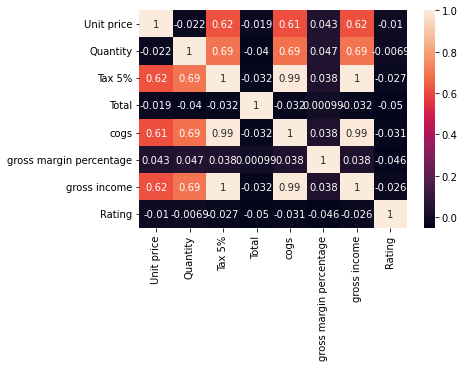

In [247]:
heatmap()

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross income', ylabel='Density'>

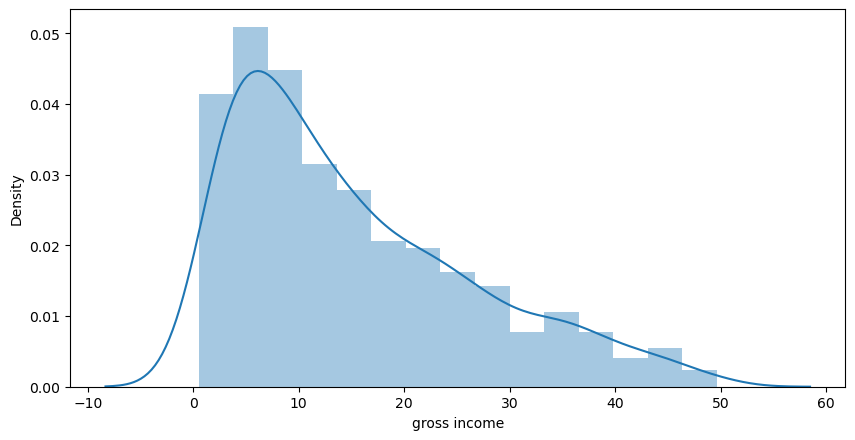

In [248]:
#Distribution of gross income
plt.figure(figsize=(10, 5), dpi = 100)
sns.distplot(df['gross income'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross income'>

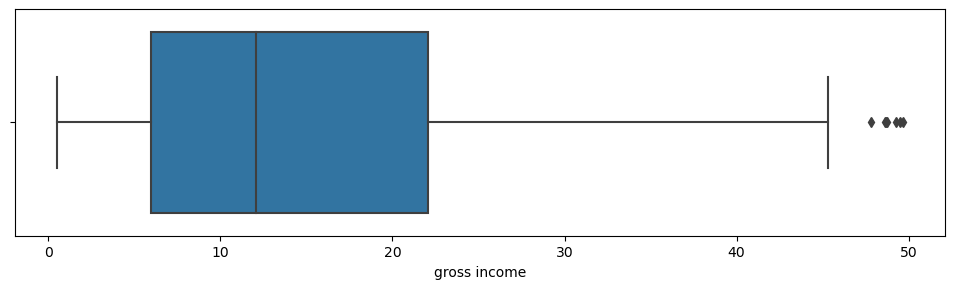

In [249]:
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['gross income'])

<AxesSubplot:>

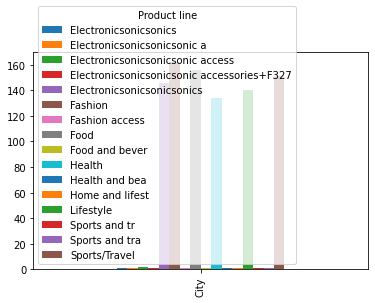

In [250]:
Quantity=df.pivot_table(columns=['Product line'], values='City', aggfunc='count').round(2)

Quantity.plot.bar()

In [251]:
df.describe(include='all',datetime_is_numeric=True)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,date time
count,900,900,900,900,900,900.000000,900.000000,900.000000,9.000000e+02,900,900.000000,900.000000,900.000000,900.000000,900
unique,3,4,2,2,16,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
top,A,Yangon,Member,Male,Fashion,NaN,NaN,NaN,NaN,Ewallet,NaN,NaN,NaN,NaN,NaN
freq,305,305,456,455,162,NaN,NaN,NaN,NaN,309,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55.552089,5.501111,15.196757,1.380083e+04,NaN,304.326744,4.758254,15.170860,6.987889,2019-02-13 16:07:21.733333248
min,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,1.067850e+01,NaN,10.170000,1.000000,0.508500,4.000000,2018-02-05 10:41:00
25%,NaN,NaN,NaN,NaN,NaN,32.580000,3.000000,5.986375,1.259134e+02,NaN,123.457500,4.761905,5.986375,5.575000,2019-01-24 12:59:15
50%,NaN,NaN,NaN,NaN,NaN,54.795000,5.000000,12.076000,2.545830e+02,NaN,243.000000,4.761905,12.080000,7.000000,2019-02-13 13:52:00
75%,NaN,NaN,NaN,NaN,NaN,77.690000,8.000000,22.108500,4.699957e+02,NaN,440.310000,4.761905,22.073500,8.500000,2019-03-07 19:05:30
max,NaN,NaN,NaN,NaN,NaN,99.960000,10.000000,49.650000,1.212156e+07,NaN,993.000000,5.000000,49.650000,10.000000,2019-03-30 20:37:00


In [221]:
def get_cat_cols(df):
    types_map = df.dtypes.to_dict()
    cat_columns = []
    for k,v in types_map.items():
        if not( np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v)):
            cat_columns.append(k)

    #print(cat_columns)
    return cat_columns


In [222]:
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    return num_columns

In [223]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

categorical_columns = get_cat_cols(df)

def chi_square_test(cat_cols, df):
    for i in range(3):  #(len(cat_cols)-1):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(i+1,4): #len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

    # interpret p-value
            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")

In [224]:
chi_square_test(categorical_columns,df)
print(categorical_columns)


	 --------Branch--------
City    Mandalay  Naypyidaw  Naypyidawp  Yangon
Branch                                         
A              0          0           0     305
B            292          0           0       0
C              0        302           1       0
dof=6
[[ 98.95555556 102.34444444   0.33888889 103.36111111]
 [ 94.73777778  97.98222222   0.32444444  98.95555556]
 [ 98.30666667 101.67333333   0.33666667 102.68333333]]
significance=0.050, p=0.000
Dependent (reject H0)


Customer type  Member  Normal
Branch                       
A                 153     152
B                 146     146
C                 157     146
dof=2
[[154.53333333 150.46666667]
 [147.94666667 144.05333333]
 [153.52       149.48      ]]
significance=0.050, p=0.886
Independent (fail to reject H0)


Gender  Female  Male
Branch              
A          141   164
B          140   152
C          164   139
dof=2
[[150.80555556 154.19444444]
 [144.37777778 147.62222222]
 [149.81666667 153.18333333]]
signi

In [225]:
#t test
def t_test(df):
    num_columns = get_num_cols(df)
    for i in range(3): #(len(num_columns)-1):
        print("\n --------"+num_columns[i]+"--------")
        for j in range(i+1, 5): #(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(df[col1], df[col2])
            if(p_val<0.05):
                print("Dependent (reject H0) \t(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
          
            else:
                   print('Independent (fail to reject H0)',num_columns[i], num_columns[j])


In [226]:
t_test(df)



 --------Unit price--------
Dependent (reject H0) 	(Unit price,Quantity) => t-value=56.36005177476656, p-value=0.0
Dependent (reject H0) 	(Unit price,Tax 5%) => t-value=41.93398903938961, p-value=1.3123640453083724e-268
Independent (fail to reject H0) Unit price Total
Dependent (reject H0) 	(Unit price,cogs) => t-value=-32.43527394421932, p-value=4.309666446527856e-182

 --------Quantity--------
Dependent (reject H0) 	(Quantity,Tax 5%) => t-value=-24.516066251146373, p-value=9.483444647532947e-115
Independent (fail to reject H0) Quantity Total
Dependent (reject H0) 	(Quantity,cogs) => t-value=-39.21834727156969, p-value=1.284787819936441e-243

 --------Tax 5%--------
Independent (fail to reject H0) Tax 5% Total
Dependent (reject H0) 	(Tax 5%,cogs) => t-value=-37.90102759822229, p-value=1.5530761602948748e-231


In [227]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

numeric_columns = get_num_cols(df)

def anova_test(num_cols, cat_cols, df):
    for i in range(3): #(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(3):#(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=df).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()

In [228]:
anova_test(numeric_columns, categorical_columns, df)

SyntaxError: invalid syntax (<unknown>, line 1)

In [229]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,date time
0,A,Yangon,Member,Female,Health,74.69,7.0,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,C,Naypyidaw,Normal,Female,Electronics,15.28,5.0,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,A,Yangon,Normal,Male,Lifestyle,46.33,7.0,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,A,Yangon,Member,Male,Health,58.22,8.0,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
13,A,Yangon,Normal,Male,Food,43.19,10.0,21.5950,453.4950,Ewallet,431.90,4.761905,21.5950,8.2,2019-02-07 16:48:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,A,Yangon,Member,Male,Electronics,20.89,2.0,2.0890,43.8690,Cash,41.78,4.761905,2.0890,9.8,2019-02-05 18:45:00
962,A,Yangon,Normal,Female,Fashion,15.50,1.0,0.7750,16.2750,Credit card,15.50,4.761905,0.7750,7.4,2019-03-19 15:23:00
963,C,Naypyidaw,Member,Male,Electronics,96.82,3.0,14.5230,304.9830,Cash,290.46,4.761905,14.5230,6.7,2019-03-30 20:37:00
964,B,Mandalay,Normal,Male,Food,33.33,2.0,3.3330,69.9930,Credit card,66.66,4.761905,3.3330,6.4,2019-01-26 14:41:00


In [191]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd  #TUKEY TEST


def tukeyhsd_test(num_cols, cat_cols, df):
    for i in range(3):#(len(num_cols)-1):
        num_var = num_cols[i]
        print("\t-------------"+num_var+"-------------")
        for j in range(3):#(len(cat_cols)-1):
            cat_var = cat_cols[j]
            tukey = pairwise_tukeyhsd(endog=df[num_var], groups=df[cat_var], alpha=0.05)
            #display results
            
            print(cat_var)
            print(tukey)
            print()

In [192]:
tukeyhsd_test(numeric_columns, categorical_columns, df)

	-------------Unit price-------------
Branch
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   1.0869 0.8571 -4.0057 6.1795  False
     A      C   2.2574 0.5428 -2.7878 7.3025  False
     B      C   1.1705 0.8356 -3.9303 6.2713  False
---------------------------------------------------

City
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
  Mandalay  Naypyidaw   1.2575    0.9  -4.3394  6.8544  False
  Mandalay Naypyidawp -25.1164 0.7541 -93.4276 43.1949  False
  Mandalay     Yangon  -1.0869    0.9  -6.6703  4.4965  False
 Naypyidaw Naypyidawp -26.3739 0.7275 -94.6813 41.9335  False
 Naypyidaw     Yangon  -2.3444 0.6735  -7.8803  3.1915  False
Naypyidawp     Yangon  24.0295  0.777 -44.2768 92.3358  False
---------------------------